In [1]:
import numpy as np
import gensim
import random
from generator import generateBatchPipeline, generateLinearPipeline, generateStreamingPipeline
import matplotlib.pyplot as plt

In [2]:
def genBatch(num_plan=10000):
    num_small_plan = int(0.2 * num_plan)
    for _ in range(num_small_plan):
        sentences.append(generateBatchPipeline(random.randint(5, 20), '*')['plt_vec'])

    num_medium_plan = int(0.5 * num_plan)
    for _ in range(num_medium_plan):
        sentences.append(generateBatchPipeline(random.randint(20, 50), ['spark', 'flink', 'storm', 'samza', 'hadoop'])['plt_vec'])

    
    num_large_plan = int(0.3 * num_plan)
    for _ in range(num_large_plan):
        sentences.append(generateBatchPipeline(random.randint(50, 100), ['spark', 'flink', 'storm', 'hadoop'])['plt_vec'])
    
def genLinear(num_plan=10000):

    ratio = (0.2, 0.3, 0.3, 0.2)
    for _ in range(int(ratio[0] * num_plan)): # 生成100个 [200,500) 随机大小的workflow
        sentences.append(generateLinearPipeline(random.randint(5, 50), '*')['plt_vec'])

    for _ in range(int(ratio[1] * num_plan)): # 生成100个 [200,500) 随机大小的workflow
        sentences.append(generateLinearPipeline(random.randint(50, 200), ['pytorch', 'tensorflow', 'theano', 'caffe', 'keras', 'mxnet'])['plt_vec'])

    
    for _ in range(int(ratio[2] * num_plan)): # 生成100个 [200,500) 随机大小的workflow
        sentences.append(generateLinearPipeline(random.randint(200, 500), ['pytorch', 'tensorflow', 'keras'])['plt_vec'])

    for _ in range(int(ratio[3] * num_plan)): # 生成30个 [500,3000) 随机大小的workflow
        sentences.append(generateLinearPipeline(random.randint(500, 3000), ['pytorch', 'tensorflow', 'keras'])['plt_vec'])

def genStreaming(num_plan=10000):
    ratio = (0.2, 0.5, 0.3)

    for _ in range(int(ratio[0] * num_plan)):
        sentences.append(generateStreamingPipeline(random.randint(5, 20), '*')['plt_vec'])

    for _ in range(int(ratio[1] * num_plan)):
        sentences.append(generateStreamingPipeline(random.randint(20, 50), ['storm', 'flink', 'samza', 'sparkstreaming', 'kafka', 'flume', 'redis'])['plt_vec'])

    for _ in range(int(ratio[2] * num_plan)):
        sentences.append(generateStreamingPipeline(random.randint(50, 100), ['storm', 'flink', 'redis'])['plt_vec'])



In [3]:
sentences = []
genLinear(10000)
genBatch(10000)
genStreaming(10000)

In [4]:
embedding_size = 6
window = 3
min_count = 1
initial_lr = 0.001

model = gensim.models.Word2Vec(
    sentences=sentences, 
    size=embedding_size, 
    window=window, 
    min_count=min_count,
    negative=0,
    alpha=initial_lr
    )

In [5]:
vocab = model.wv.vocab

In [6]:
model.get_latest_training_loss()

0.0

In [21]:
# model.save('./embedding.model')

In [11]:
model.wv.most_similar('spark', topn=2)

[('flink', 0.523341178894043), ('hadoop', 0.5051695108413696)]

In [22]:
model.wv.get_vector("spark")[:2]

array([0.05302447, 0.05602797], dtype=float32)

In [39]:
vocab = model.wv.vocab.keys()


In [7]:
x = []
y = []
labels = []
for v in vocab:
    x.append(model.wv.get_vector(v)[0])
    y.append(model.wv.get_vector(v)[1])
    labels.append(v)

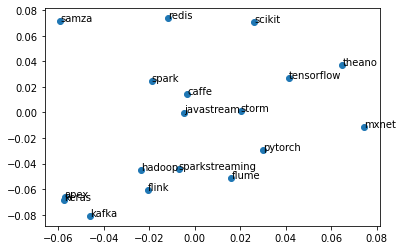

In [9]:
fig, ax = plt.subplots()
ax.scatter(x, y)

# plt.scatter(x, y)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
